In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading Dataset
Coke=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")

In [4]:
Coke.shape

(42, 2)

In [5]:
Coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [6]:
Coke['Quarters'] = 0
Coke['Year'] = 0
for i in range(42):
    a = Coke["Quarter"][i]
    Coke['Quarters'][i]= a[0:2]
    Coke['Year'][i]= a[3:5]

In [7]:
Coke.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [8]:
Coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quarter   42 non-null     object 
 1   Sales     42 non-null     float64
 2   Quarters  42 non-null     object 
 3   Year      42 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


In [9]:
dummy = pd.DataFrame(pd.get_dummies(Coke['Quarters']))
Coke = pd.concat([Coke,dummy],axis = 1)
Coke.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


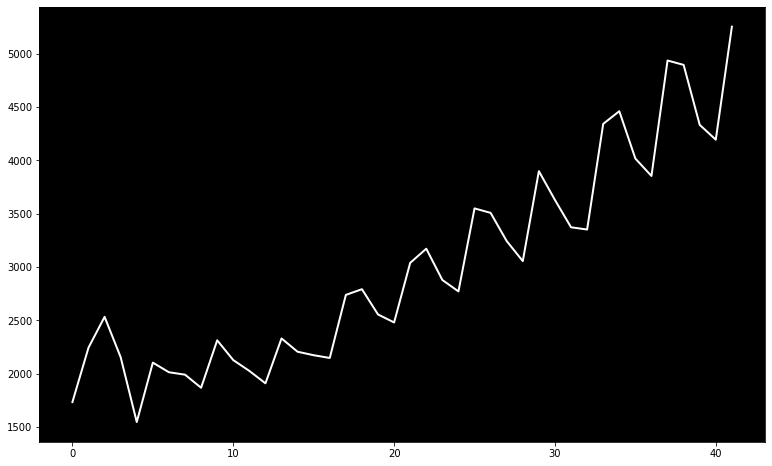

In [10]:
plt.figure(figsize=(13,8))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(Coke['Sales'], color = 'white', linewidth=2)

**This line plot is used to show changes in sales over time.**

**As the line is not a straight line there are peaks and valleys which indicates that some factors that are affecting sales**

**The peaks represent the highest values of data being plotted & the valleys represent the lowest values.** 

<AxesSubplot:>

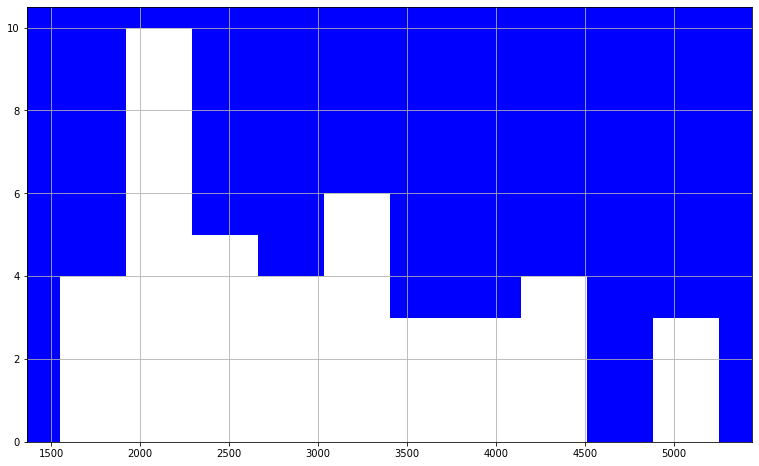

In [11]:
ax = plt.axes()
ax.set_facecolor("blue")
Coke['Sales'].hist(figsize=(13,8), color = 'white')

**Insights:**
 
**Among the data set we are getting maximum of the sales amount in 2K to 2.5K range.**

**for only one quarter we are getting highest sales amount which is 5K ,otherwise for rerst of the quarters sales amount ranges from 1500-4500.**

<AxesSubplot:ylabel='Density'>

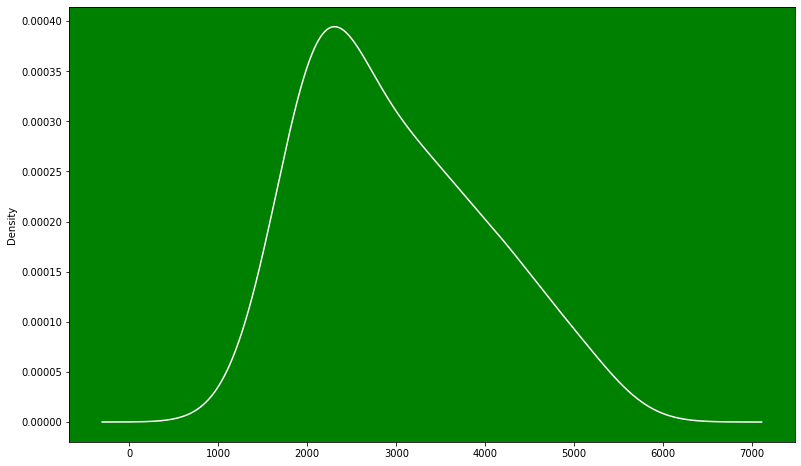

In [12]:
ax=plt.axes()
ax.set_facecolor("green")
Coke['Sales'].plot(kind = 'kde', figsize=(13,8), color = 'white')

**Here also the density plot shows highest peak for the sales amount ranging between 2K to 2.5K.**

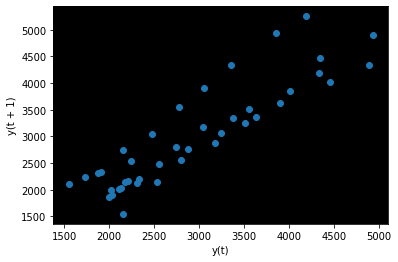

In [13]:
from pandas.plotting import lag_plot
ax = plt.axes()
lag_plot(Coke['Sales'])
ax.set_facecolor("black")
plt.show()

**This lag plot shows a scattered pattern of data points that are moderately positively correlated,there is a strong linear relationship between sales at time t and t+1**

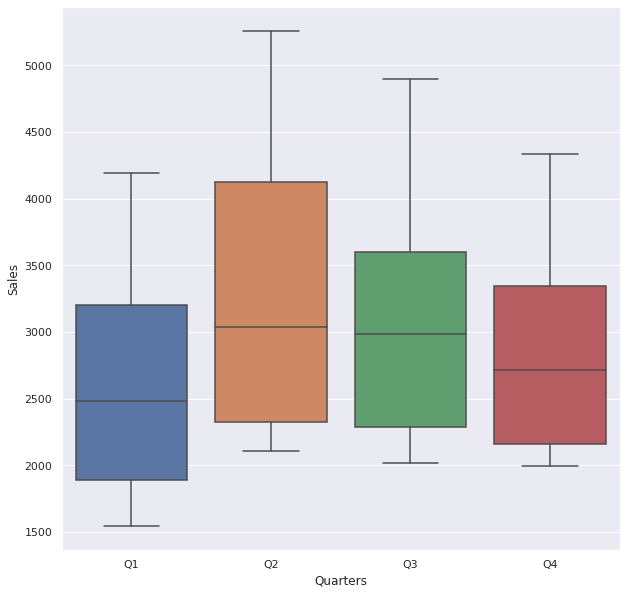

In [14]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x="Quarters",y="Sales",data=Coke)
ax.set_facecolor("red")
plt.show()

**Sales for the Q2 has a larger range than Q1 & Q3, as the whiskers extend to higher maximum values and lower minimum values.** 


**The median for Q2 is also higher than that of the Q1 & Q3,indicating that the sales were highest in Q2.**

**Sales for Q4 has the smallest range as compared with rest of the quarters,Median for the Q4 is also lower indicating that the sales were lower in Q4.**

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

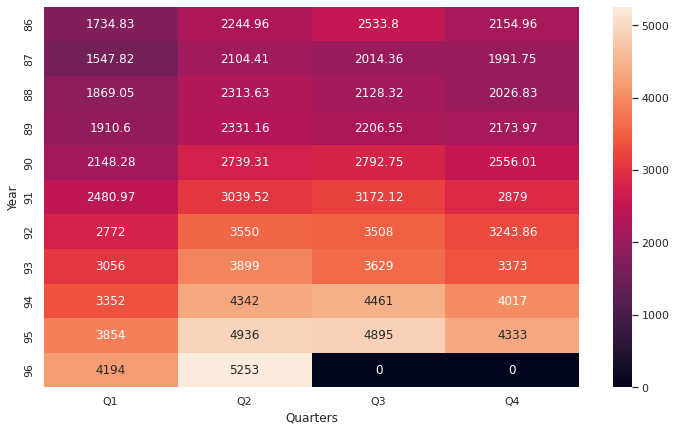

In [15]:
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=Coke,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

**This heatmap shows sales value for years & quarters years & quarters which are more correlated with eachother represents the sales value in warm color like orange,pink. Years & quarters which are not so related with eachother represents sales value using cool colors like black, purple.**

**here we can see for the year 96 (Quarters Q3 & Q4) has 0 Sales value.**


**As well as for the same year 96(quarter Q2) got the highest Sales values among all the values.**


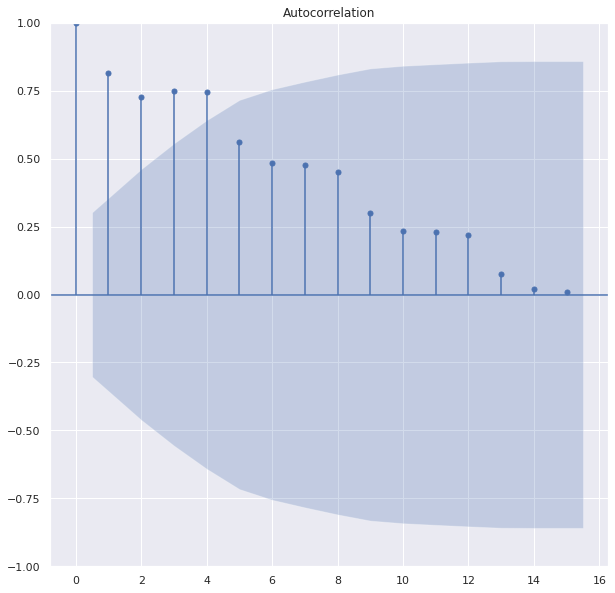

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Coke.Sales,lags=15)
plt.show()

**Function Used: ACF(Auto-Correlation Function)**

**here the height of the bars represents the correlation between the time series and its lagged values(sales). As all the bars appeared into the positive side there exist a positive correlation.**



**As the first bar in the plot is positive and relatively high  means there is a positive correlation between the time series and its lagged values at a lag of 1.**

**Where the blue shaded area shows the confidence interval, some of the bars extended beyond the confidence interval there can be a significant correlation which is unlikely to occur.**



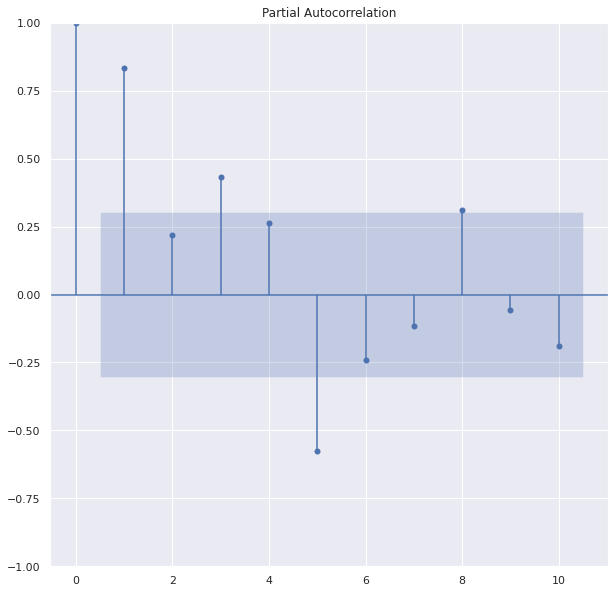

In [17]:
tsa_plots.plot_pacf(Coke.Sales,lags=10)
plt.show()

**Function Used:PACF(Partial-Correlation Function)**

**Now if we observe not all the bars appeared into the positive side some of the bars appereed into the negative side there exist a positive as well as negative correlation.**



**But the first bar in the plot is positive and relatively high  means there is a positive correlation between the time series and its lagged values at a lag of 1.**

<AxesSubplot:xlabel='Year', ylabel='Sales'>

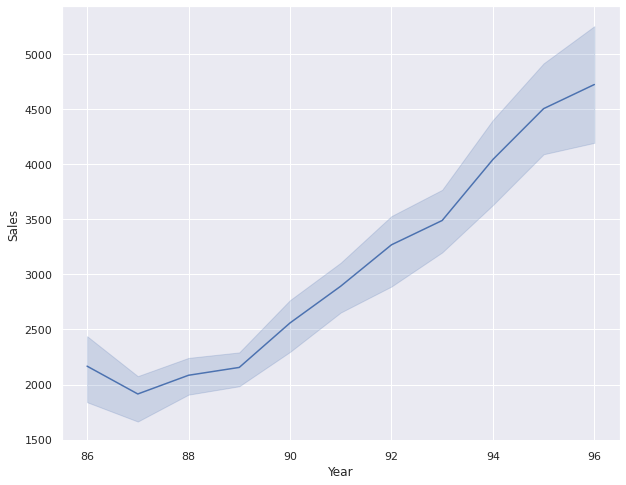

In [18]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Year",y="Sales",data=Coke)

**This line plot shows year-over-year steady rise in no. of Sales.**

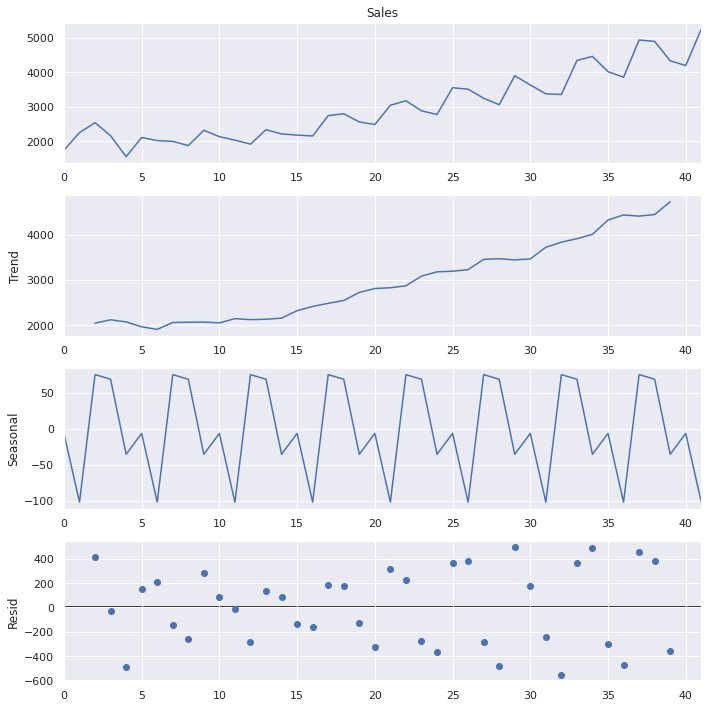

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(Coke.Sales,period=5)
decompose.plot()
plt.show()

**Here will analyze the decomposed components and write insights about the trend, seasonality, and residuals of the time series:**


**Trend:Here we can observe that there is a an upward trend in the sales of coke over time,which means demand for coke is increasing over time, which could be due to certain factors such as change in consumer preferences, marketing strategies etc.**

**Seasonality:Here we can observe there is a same pattern in the sales of coke which repeats every 5 periods indicating that there is a seasonal effect on the sales of coke, which could be due to factors such as weather, holidays etc.**

**Residuals:Here we can obsereve random fluctuations in the sales of coke. By seeing residuals, we can not identify any pattern(datapoints are deviated from expected pattern which we have seen in above two plots) here the factors could be outliers, measurement errors etc.**

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
Train = Coke.head(32)
Test = Coke.tail(10)

**Now we are going to get different RMSE scores using different models, this score gives average difference between the predicted sales values and the actual sales values in test data.** 

**We will compare RMSE value that we will obtained from different models & then will pick the one which has lower value among all.**

In [22]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [23]:
ses_m = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses =ses_m.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_m =RMSE(Test.Sales, pred_ses)
rmse_ses_m

1034.9359056453961

In [24]:
hst_m = Holt(Train["Sales"]).fit()
pred_hst = hst_m.predict(start = Test.index[0],end = Test.index[-1])
rmse_hst_m = RMSE(Test.Sales, pred_hst)
rmse_hst_m

941.6367810616845

In [25]:
hwe_model_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add = hwe_model_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_m = RMSE(Test.Sales, pred_hwe_add)
rmse_hwe_add_m

633.4394050169811

In [26]:
hwe_model_mul = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul = hwe_model_mul.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_m = RMSE(Test.Sales, pred_hwe_mul)
rmse_hwe_mul_m

568.1679856842486

In [27]:
Coke["t"] = np.arange(1,43)
Coke["t_squared"] = Coke["t"]*Coke["t"]
Coke["log_sales"] = np.log(Coke["Sales"])
Coke.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [28]:
Train = Coke.head(32)
Test = Coke.tail(10)

In [29]:
import statsmodels.formula.api as smf 
lm = smf.ols('Sales~t',data=Train).fit()
pred_l =  pd.Series(lm.predict(pd.DataFrame(Test['t'])))
rmse_lm = RMSE(Test['Sales'], pred_l)
rmse_lm

752.9233932767116

In [30]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Expm = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Expm

590.3316432076487

In [31]:
quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_quad = pd.Series(quad.predict(Test[["t","t_squared"]]))
rmse_quadm = RMSE(Test['Sales'], pred_quad)
rmse_quadm

457.735735540752

In [32]:
add_season = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_season = pd.Series(add_season.predict(Test[['Q1','Q2','Q3']]))
rmse_add_season = RMSE(Test['Sales'], pred_add_season)
rmse_add_season

1850.466546185836

In [33]:
add_sea_quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad_m = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_quad_m 

277.3510771128639

In [34]:
mul_season = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_mult_season = pd.Series(mul_season.predict(Test))
rmse_mul_season = RMSE(Test['Sales'], np.exp(pred_mult_season))
rmse_mul_season

1908.2503948361164

In [35]:
mul_Add_season = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_mult_add_season = pd.Series(mul_Add_season.predict(Test))
rmse_mul_Add_season = RMSE(Test['Sales'], np.exp(pred_mult_add_season))
rmse_mul_Add_season

448.86781826918514

In [36]:
list = [[' Exponential Method',rmse_ses_m], ['Holt method',rmse_hst_m],
          ['exp smoothing add',rmse_hwe_add_m],['exp smoothing mult',rmse_hwe_mul_m],
          ['Linear Model',rmse_lm],['Exp model',rmse_Expm],['Quad model',rmse_quadm],
          ['add seasonality',rmse_add_season],['Quad add seasonality',rmse_add_sea_quad_m],
          ['Multi Seasonality',rmse_mul_season],['Multi add seasonality',rmse_mul_Add_season]]

In [37]:
Coke1=pd.DataFrame(list,columns=['Model','RMSE_Value'])
Coke1

,Model,RMSE_Value
0,Exponential Method,1034.935906
1,Holt method,941.636781
2,exp smoothing add,633.439405
3,exp smoothing mult,568.167986
4,Linear Model,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Multi Seasonality,1908.250395


**In order to get a better sense of how well our model is performing, we are comparing the RMSE scores that we've obtained using different models**.

**Lower values of RMSE indicates that our model is good at predicting values when compared with the actual ones.**

**Among the above models additive seasonality quadratic model have least RMSE value so ARIMA value can be preffered that other models**

In [38]:
Coke.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [39]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Coke).fit()
pred_final = pd.Series(final_model.predict(Coke[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(Coke['Sales'], pred_final)
rmse_final_model

159.0552257652248

In [40]:
pred_coke = pd.DataFrame({'Actual':Coke.Sales, 'Predicted' : pred_final})
pred_coke

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


**Here we can see the improvement, we have placed predicted values against the actual ones and the values are almost same.**

**Means our model is performing well.**

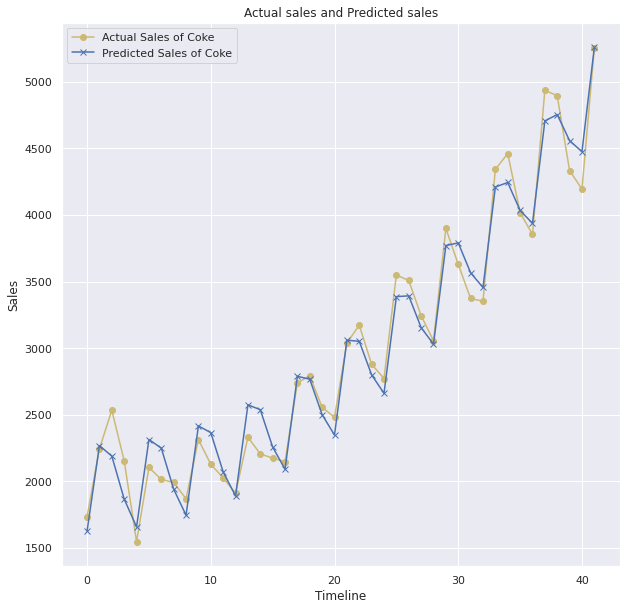

In [41]:
plt.plot(Coke.Sales, color='y',marker='o', label='Actual Sales of Coke')
plt.plot(pred_final, color='b',marker='x', label='Predicted Sales of Coke')
plt.title('Actual sales and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (15,10) 
plt.show()

**In this visualization we've plotted actual sales for coke against predicted sales, we can see how closely the predicted values match the actual values.The two lines are very close together indicating that our predictive model is accurate.**






**Here we can also observe that there is a an upward trend in the sales of coke over time,which means demand for coke is increasing over time.**